In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
airpas = pd.read_csv(r'D:\Datasets\AirPassengers.csv')

In [3]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# convert the month col n date time format which is in object type now

In [5]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format = True) 
ind_airpas = airpas.set_index(['Month'])

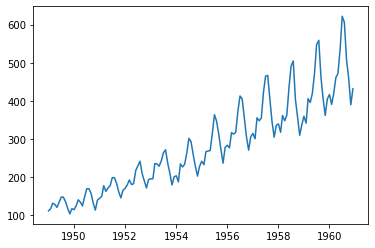

In [6]:
plt.plot(ind_airpas) #original data was not stationary

In [7]:
ind_airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


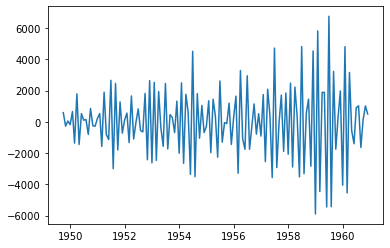

In [8]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff())

# after several levels of differencing, data was still not stationary

In [9]:
ind_airpas_log = np.log(ind_airpas)

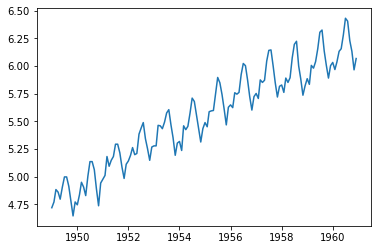

In [10]:
plt.plot(ind_airpas_log)

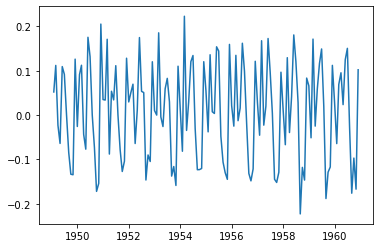

In [11]:
plt.plot(ind_airpas_log.diff())

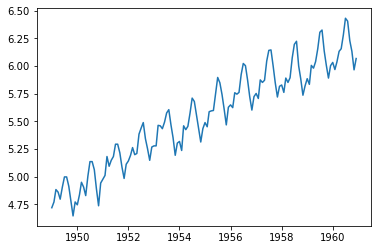

In [12]:
plt.plot(ind_airpas_log)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


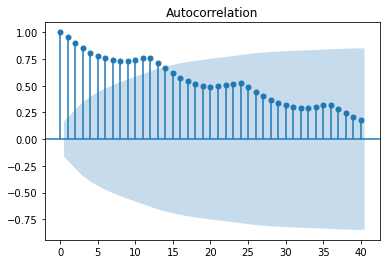

In [14]:
plot_acf(ind_airpas_log.Passengers, lags = 40);

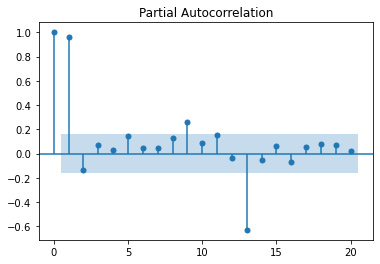

In [15]:
plot_pacf(ind_airpas_log.Passengers, lags = 20);

In [16]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ind_airpas_log, order=(2,1,0))
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [17]:
result.params

const                 0.009600
ar.L1.D.Passengers    0.235864
ar.L2.D.Passengers   -0.172474
dtype: float64

In [18]:
result.forecast(steps = 12) # first array is forcast values, 2nd is error and third is p,q values

(array([6.13038725, 6.13635264, 6.13606416, 6.14395851, 6.15486152,
        6.16506284, 6.17457975, 6.18405624, 6.19364126, 6.20325883,
        6.21286537, 6.22246369]),
 array([0.10248369, 0.16292524, 0.1992398 , 0.2264801 , 0.25095755,
        0.27376969, 0.29490959, 0.31457336, 0.33305177, 0.35056068,
        0.36724061, 0.38319578]),
 array([[5.92952291, 6.33125159],
        [5.81702504, 6.45568025],
        [5.74556134, 6.52656699],
        [5.70006567, 6.58785134],
        [5.66299375, 6.64672928],
        [5.62848411, 6.70164157],
        [5.59656757, 6.75259193],
        [5.5675038 , 6.80060869],
        [5.54087179, 6.84641072],
        [5.51617253, 6.89034514],
        [5.49308699, 6.93264375],
        [5.47141377, 6.97351362]]))

In [19]:
result.forecast(steps = 12)[0]

array([6.13038725, 6.13635264, 6.13606416, 6.14395851, 6.15486152,
       6.16506284, 6.17457975, 6.18405624, 6.19364126, 6.20325883,
       6.21286537, 6.22246369])

In [20]:
np.exp(result.forecast(steps = 12)[0]).round() # to convert into log values into reverse log(normal values)

array([460., 462., 462., 466., 471., 476., 480., 485., 490., 494., 499.,
       504.])

In [21]:
# from the above data points we notice that the forcasted results have not captured
# the seasonality.. in the below graph we will showcase the

In [22]:
forecast_values    = result.forecast(steps = 12)


In [23]:
forecast_values_df = pd.DataFrame(forecast_values[0]) 
forecast_values_df = np.exp(forecast_values_df)


In [24]:
#forecast_values_df

In [25]:
forecast_values_df.rename(columns = {forecast_values_df.columns[0] : 'Predicted'}, inplace = True)

In [26]:
date_for_pred = ['1961-01-01'  , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01', 
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']


In [27]:
forecast_values_df  = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)


In [28]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True)  
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )  

In [29]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

,Predicted
Month,
1961-01-01,459.614114
1961-02-01,462.364085
1961-03-01,462.230721
1961-04-01,465.894171
1961-05-01,471.001612


<AxesSubplot:xlabel='Month'>

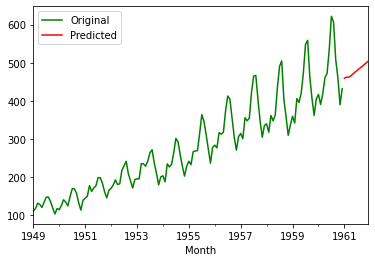

In [30]:
ind_airpas['Passengers'].plot(legend = True, label = 'Original', color= 'green')
pred_airpas['Predicted'].plot(legend = True, label = 'Predicted', color= 'red')


In [31]:
# above plot confirms forecast isnot good.
#It is neither able to capture the trend nor seasonality

# building the model by using the sequential sampling

In [32]:
train = ind_airpas.iloc[0:132]
test = ind_airpas.iloc[132:144]

<AxesSubplot:xlabel='Month'>

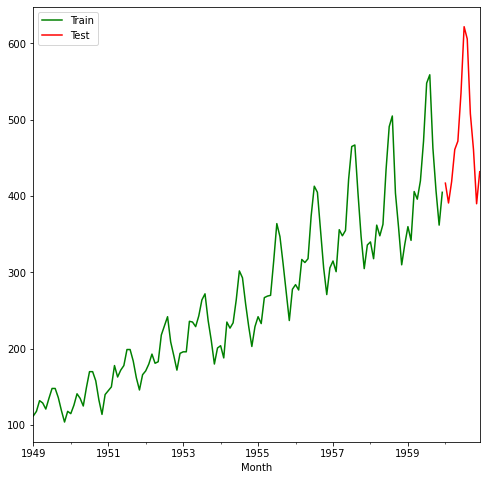

In [33]:
plt.figure(figsize=(8,8))
train['Passengers'].plot(legend= True, label= 'Train', color = 'green' )
test['Passengers'].plot(legend= True, label= 'Test', color = 'red')

In [34]:
train_log = np.log(train) # this one
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ind_airpas_log, order=(4,1,7))
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [35]:
forecast_values = result.forecast(steps = 12)
forecast_values

forecast_values[0]

forecast_values_df = pd.DataFrame(forecast_values[0]) # this one
forecast_values_df


forecast_values_df = np.exp(forecast_values_df) # this one


date_for_pred = ['1960-01-01'  , '1960-02-01' ,
                 '1960-03-01', '1960-04-01','1960-05-01', 
                 '1960-06-01', '1960-07-01','1960-08-01',
                 '1960-09-01', '1960-10-01','1960-11-01',
                 '1960-12-01']


In [36]:
forecast_values_df  = pd.concat([  pd.Series(test.index )  , forecast_values_df] , axis = 1)
l1 = [ 'Month'  , 'Passengers']
forecast_values_df.columns = l1
forecast_values_df.head()


,Month,Passengers
0,1960-01-01,459.614114
1,1960-02-01,462.364085
2,1960-03-01,462.230721
3,1960-04-01,465.894171
4,1960-05-01,471.001612


<AxesSubplot:xlabel='Month'>

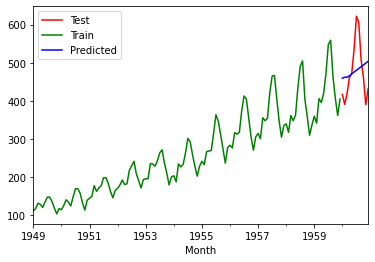

In [37]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True ) 

forecast_values_df = forecast_values_df.set_index(['Month']) 
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")


In [38]:
# lets find the numbers for validation

In [39]:
error = test['Passengers'] - forecast_values_df['Passengers']
error

Month
1960-01-01    -42.614114
1960-02-01    -71.364085
1960-03-01    -43.230721
1960-04-01     -4.894171
1960-05-01      0.998388
1960-06-01     59.168956
1960-07-01    141.618900
1960-08-01    121.044931
1960-09-01     18.374283
1960-10-01    -33.357446
1960-11-01   -109.129395
1960-12-01    -71.943265
Name: Passengers, dtype: float64

In [40]:
MSE417 = np.mean(np.square(error))
MSE417

5462.232152248249

In [41]:
mape417 = np.mean(np.abs(error*100/test['Passengers']))
mape417

12.446025014013221

# model with SARIMAX

In [42]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose # this is optional because most of the time we know it is seasonal
import pmdarima
from pmdarima import auto_arima

In [44]:
result = seasonal_decompose(ind_airpas_log)

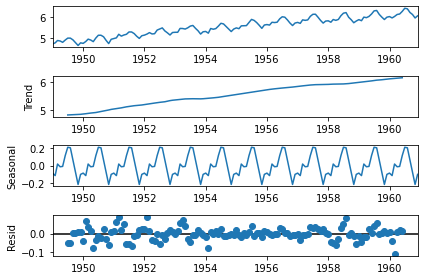

In [45]:
result.plot();  # this graph is to get the information that has the seasonal effect

In [48]:
auto_arima(ind_airpas_log, seasonal=True, m =12) # m is the total months 
           # arima order params is on the entire data without seasonal data 

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [49]:
model_sarima = SARIMAX(ind_airpas_log, order=(2,0,0), seasonal_order=(0,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [50]:
results = model_sarima.fit()

In [51]:
pred_result = results.predict()

In [52]:
results.predict(start=132, end=144)

1960-01-01    6.039097
1960-02-01    5.984854
1960-03-01    6.128304
1960-04-01    6.039670
1960-05-01    6.131070
1960-06-01    6.305643
1960-07-01    6.415825
1960-08-01    6.436377
1960-09-01    6.238450
1960-10-01    6.097036
1960-11-01    5.991818
1960-12-01    6.083819
1961-01-01    6.103785
Freq: MS, Name: predicted_mean, dtype: float64

In [54]:
results.forecast()  # it is forecasting for one month only

1961-01-01    6.103785
Freq: MS, dtype: float64

In [55]:
# model has been build forecast .. below code is for validation purpose

In [56]:
pred_result_actual_scale = np.exp(pred_result)
pred_result_actual_scale

1949-01-01      1.000000
1949-02-01      1.000000
1949-03-01      1.000000
1949-04-01      1.000000
1949-05-01      1.000000
                 ...    
1960-08-01    624.141218
1960-09-01    512.064059
1960-10-01    444.538419
1960-11-01    400.141308
1960-12-01    438.701407
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [57]:
err = ind_airpas.Passengers[132:144] -pred_result_actual_scale
np.mean(np.square(err))

375.19743136736605

In [58]:
mape = np.mean(np.abs(err*100/ind_airpas.Passengers[132:144]))
mape

3.2315214266140413

In [59]:
results_1 = results.predict(start=144, end=155)
results_1 = np.exp(results_1)            

In [60]:
results_2 = results.predict(start=156, end=167)
results_2 = np.exp(results_2)

<AxesSubplot:>

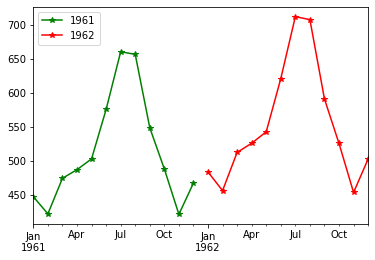

In [61]:
results_1.plot(legend=True, label='1961', color='green', marker='*')
results_2.plot(legend=True, label='1962', color='red', marker='*')